=== UNDERSTANDING pred > 0.5: BINARY DECISION MAKING ===

1. WHAT THE NEURAL NETWORK OUTPUTS:
   - Raw predictions are probabilities between 0 and 1
   - Each pixel gets a probability value
   - 0.0 = 0% chance of being foreground
   - 1.0 = 100% chance of being foreground
   - 0.5 = 50% chance (uncertain)

2. CONCRETE EXAMPLE:
   Let's say we have a 3x3 image with these probability values:

   Raw probabilities:
    tensor([[0.1000, 0.8000, 0.3000],
        [0.9000, 0.5000, 0.7000],
        [0.2000, 0.6000, 0.4000]])

3. THE DECISION PROCESS:
   For each pixel, we ask: 'Is this pixel foreground?'
   Decision rule: If probability > 0.5 → YES (1), else → NO (0)

   After pred > 0.5:
    tensor([[0., 1., 0.],
        [1., 0., 1.],
        [0., 1., 0.]])

4. PIXEL-BY-PIXEL BREAKDOWN:
   Pixel (0,0): 0.1 ≤ 0.5 → BACKGROUND (0)
   Pixel (0,1): 0.8 > 0.5 → FOREGROUND (1)
   Pixel (0,2): 0.3 ≤ 0.5 → BACKGROUND (0)
   Pixel (1,0): 0.9 > 0.5 → FOREGROUND (1)
   Pixel (1,1): 0.5 ≤ 0.5 → BACKGROU

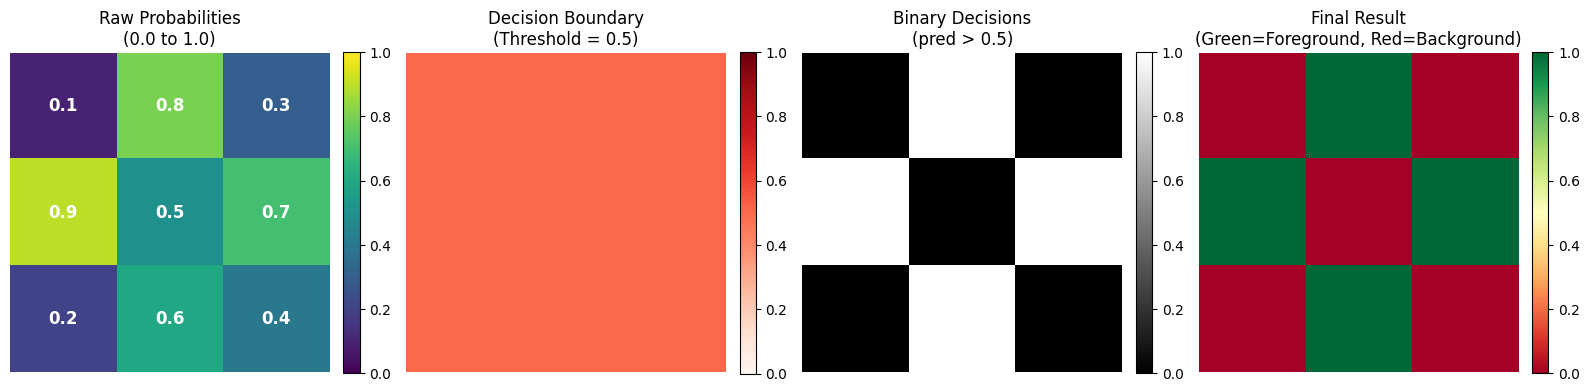

7. IN YOUR CODE:
   pred = (pred > 0.5).float()
   - pred: raw probabilities from network
   - > 0.5: binary decision for each pixel
   - .float(): convert boolean to float (True→1.0, False→0.0)
   - Result: binary mask ready for Dice/IoU calculation

8. KEY INSIGHT:
   The neural network is uncertain about each pixel.
   pred > 0.5 converts that uncertainty into a clear decision:
   'This pixel is foreground' or 'This pixel is background'
   This binary decision is what we need for segmentation!


In [9]:
# Understanding pred > 0.5: Making Binary Decisions

import torch
import numpy as np
import matplotlib.pyplot as plt

print("=== UNDERSTANDING pred > 0.5: BINARY DECISION MAKING ===\n")

print("1. WHAT THE NEURAL NETWORK OUTPUTS:")
print("   - Raw predictions are probabilities between 0 and 1")
print("   - Each pixel gets a probability value")
print("   - 0.0 = 0% chance of being foreground")
print("   - 1.0 = 100% chance of being foreground")
print("   - 0.5 = 50% chance (uncertain)")
print()

# Create a simple example
print("2. CONCRETE EXAMPLE:")
print("   Let's say we have a 3x3 image with these probability values:")
print()

# Create example probabilities
probabilities = torch.tensor([
    [0.1, 0.8, 0.3],
    [0.9, 0.5, 0.7],
    [0.2, 0.6, 0.4]
])

print("   Raw probabilities:")
print("   ", probabilities)
print()

print("3. THE DECISION PROCESS:")
print("   For each pixel, we ask: 'Is this pixel foreground?'")
print("   Decision rule: If probability > 0.5 → YES (1), else → NO (0)")
print()

# Apply the decision
decisions = (probabilities > 0.5).float()
print("   After pred > 0.5:")
print("   ", decisions)
print()

print("4. PIXEL-BY-PIXEL BREAKDOWN:")
for i in range(3):
    for j in range(3):
        prob = probabilities[i, j].item()
        decision = decisions[i, j].item()
        if prob > 0.5:
            print(f"   Pixel ({i},{j}): {prob:.1f} > 0.5 → FOREGROUND (1)")
        else:
            print(f"   Pixel ({i},{j}): {prob:.1f} ≤ 0.5 → BACKGROUND (0)")
print()

print("5. WHY 0.5 AS THE THRESHOLD?")
print("   - 0.5 means 'equally likely to be foreground or background'")
print("   - It's the natural decision boundary")
print("   - For balanced datasets, it maximizes accuracy")
print("   - You could use other thresholds (0.3, 0.7) if needed")
print()

# Show different thresholds
print("6. DIFFERENT THRESHOLDS:")
thresholds = [0.3, 0.5, 0.7]
for thresh in thresholds:
    decision_thresh = (probabilities > thresh).float()
    foreground_count = decision_thresh.sum().item()
    print(f"   Threshold {thresh}: {foreground_count} foreground pixels")
    print(f"   ", decision_thresh)
print()

# Visual representation
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Original probabilities
im1 = axes[0].imshow(probabilities.numpy(), cmap='viridis', vmin=0, vmax=1)
axes[0].set_title('Raw Probabilities\n(0.0 to 1.0)')
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# Add probability values
for i in range(3):
    for j in range(3):
        axes[0].text(j, i, f'{probabilities[i, j]:.1f}', ha='center', va='center', 
                    color='white', fontsize=12, weight='bold')

# Decision boundary
threshold_line = np.full((3, 3), 0.5)
im2 = axes[1].imshow(threshold_line, cmap='Reds', vmin=0, vmax=1)
axes[1].set_title('Decision Boundary\n(Threshold = 0.5)')
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

# Binary decisions
im3 = axes[2].imshow(decisions.numpy(), cmap='gray', vmin=0, vmax=1)
axes[2].set_title('Binary Decisions\n(pred > 0.5)')
axes[2].axis('off')
plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

# Add decision values
for i in range(3):
    for j in range(3):
        color = 'white' if decisions[i, j] == 1 else 'black'
        axes[2].text(j, i, f'{int(decisions[i, j])}', ha='center', va='center', 
                    color=color, fontsize=12, weight='bold')

# Comparison
comparison = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        if probabilities[i, j] > 0.5:
            comparison[i, j] = 1  # Green for foreground
        else:
            comparison[i, j] = 0  # Red for background

im4 = axes[3].imshow(comparison, cmap='RdYlGn', vmin=0, vmax=1)
axes[3].set_title('Final Result\n(Green=Foreground, Red=Background)')
axes[3].axis('off')
plt.colorbar(im4, ax=axes[3], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print("7. IN YOUR CODE:")
print("   pred = (pred > 0.5).float()")
print("   - pred: raw probabilities from network")
print("   - > 0.5: binary decision for each pixel")
print("   - .float(): convert boolean to float (True→1.0, False→0.0)")
print("   - Result: binary mask ready for Dice/IoU calculation")
print()

print("8. KEY INSIGHT:")
print("   The neural network is uncertain about each pixel.")
print("   pred > 0.5 converts that uncertainty into a clear decision:")
print("   'This pixel is foreground' or 'This pixel is background'")
print("   This binary decision is what we need for segmentation!")


Image shape: (320, 256, 3)
Grayscale shape: (320, 256)
Data type: uint8
Grayscale data type: uint8


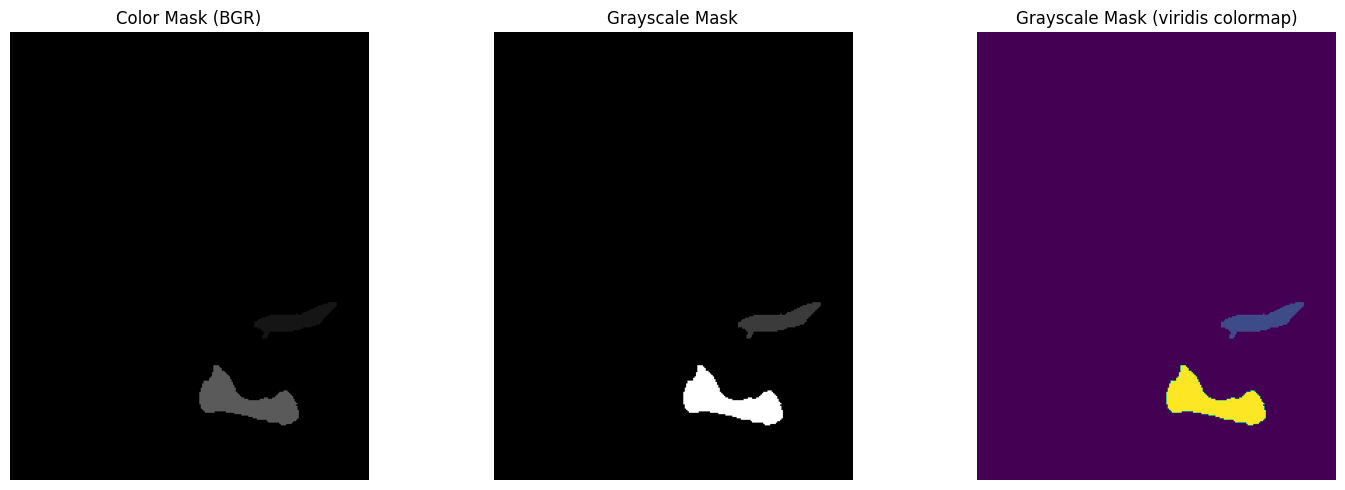

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Path to the mask image
mask_path = r'C:\Users\DUDU\Documents\MIG\dataset\muscle_top3\train\masks\patient_017\slice_0764.png'

# Read the mask image
mask = cv2.imread(mask_path, cv2.IMREAD_COLOR)  # Read as color image
mask_gray = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

print(f"Image shape: {mask.shape}")
print(f"Grayscale shape: {mask_gray.shape}")
print(f"Data type: {mask.dtype}")
print(f"Grayscale data type: {mask_gray.dtype}")

# Display the image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title('Color Mask (BGR)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_gray, cmap='gray')
plt.title('Grayscale Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mask_gray, cmap='viridis')
plt.title('Grayscale Mask (viridis colormap)')
plt.axis('off')

plt.tight_layout()
plt.show()


=== WHY MULTI-CLASS DOESN'T NEED pred > 0.5 ===

1. THE FUNDAMENTAL DIFFERENCE:
   BINARY: Only 2 choices (foreground vs background)
   MULTI-CLASS: Multiple choices (background, muscle1, muscle2)

2. BINARY SEGMENTATION:
   - Network outputs: [batch, 1, height, width]
   - Values: probabilities [0, 1]
   - Decision: 'Is this pixel foreground?'
   - Method: pred > 0.5 (threshold)

3. MULTI-CLASS SEGMENTATION:
   - Network outputs: [batch, 3, height, width]
   - Values: logits (any range)
   - Decision: 'Which class is this pixel?'
   - Method: argmax(softmax(pred)) (highest probability)

4. CONCRETE EXAMPLE:
   Let's say we have a pixel with these logits:

   Raw logits: tensor([ 2.1000,  0.8000, -0.5000])
   Background: 2.1
   Muscle1: 0.8
   Muscle2: -0.5

   After softmax (probabilities):
   Background: 0.742 (74.2%)
   Muscle1: 0.202 (20.2%)
   Muscle2: 0.055 (5.5%)
   Sum: 1.000

   Prediction: Class 0 (highest probability)

5. WHY NO THRESHOLD NEEDED:
   - We're not asking 'Is th

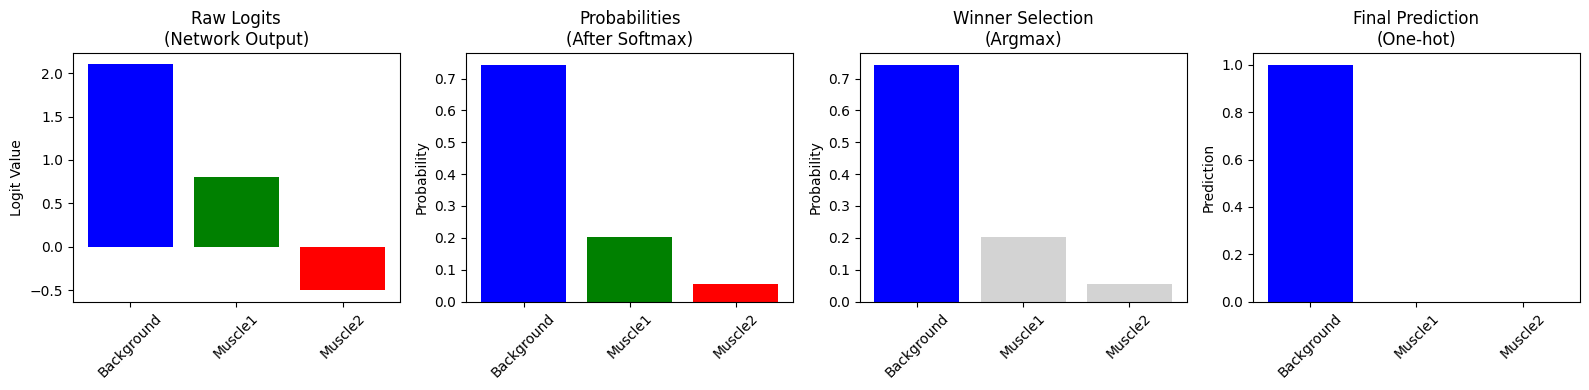

7. IN YOUR CODE:
   BINARY:
   pred = (pred > 0.5).float()  # Threshold

   MULTI-CLASS:
   pred = torch.softmax(pred, dim=1)  # Convert to probabilities
   pred_class = pred[:, class_id]  # Select specific class
   # No threshold needed!

8. KEY INSIGHT:
   Binary: 'Is this foreground?' → Need threshold
   Multi-class: 'Which class?' → Pick highest probability
   Different questions → Different methods!

9. WHY THIS MAKES SENSE:
   - Binary: Only 2 options, need to decide between them
   - Multi-class: Multiple options, just pick the best one
   - Threshold is for binary decisions, not for picking winners
   - Argmax is for picking winners, not for binary decisions


In [10]:
# Why multi-class doesn't need pred > 0.5

import torch
import numpy as np
import matplotlib.pyplot as plt

print("=== WHY MULTI-CLASS DOESN'T NEED pred > 0.5 ===\n")

print("1. THE FUNDAMENTAL DIFFERENCE:")
print("   BINARY: Only 2 choices (foreground vs background)")
print("   MULTI-CLASS: Multiple choices (background, muscle1, muscle2)")
print()

print("2. BINARY SEGMENTATION:")
print("   - Network outputs: [batch, 1, height, width]")
print("   - Values: probabilities [0, 1]")
print("   - Decision: 'Is this pixel foreground?'")
print("   - Method: pred > 0.5 (threshold)")
print()

print("3. MULTI-CLASS SEGMENTATION:")
print("   - Network outputs: [batch, 3, height, width]")
print("   - Values: logits (any range)")
print("   - Decision: 'Which class is this pixel?'")
print("   - Method: argmax(softmax(pred)) (highest probability)")
print()

# Create examples
batch_size = 1
height = 3
width = 3

print("4. CONCRETE EXAMPLE:")
print("   Let's say we have a pixel with these logits:")
print()

# Example logits for one pixel
logits = torch.tensor([2.1, 0.8, -0.5])  # [background, muscle1, muscle2]
print(f"   Raw logits: {logits}")
print(f"   Background: {logits[0]:.1f}")
print(f"   Muscle1: {logits[1]:.1f}")
print(f"   Muscle2: {logits[2]:.1f}")
print()

# Convert to probabilities
probs = torch.softmax(logits, dim=0)
print("   After softmax (probabilities):")
print(f"   Background: {probs[0]:.3f} ({probs[0]*100:.1f}%)")
print(f"   Muscle1: {probs[1]:.3f} ({probs[1]*100:.1f}%)")
print(f"   Muscle2: {probs[2]:.3f} ({probs[2]*100:.1f}%)")
print(f"   Sum: {probs.sum():.3f}")
print()

# Get prediction
pred_class = torch.argmax(probs)
print(f"   Prediction: Class {pred_class.item()} (highest probability)")
print()

print("5. WHY NO THRESHOLD NEEDED:")
print("   - We're not asking 'Is this foreground?'")
print("   - We're asking 'Which class is this?'")
print("   - Answer: The class with highest probability")
print("   - No threshold needed - just pick the winner!")
print()

print("6. COMPARISON:")
print("   BINARY:")
print("   - Question: 'Is this pixel foreground?'")
print("   - Answer: YES (prob > 0.5) or NO (prob ≤ 0.5)")
print("   - Method: pred > 0.5")
print()
print("   MULTI-CLASS:")
print("   - Question: 'Which class is this pixel?'")
print("   - Answer: Class with highest probability")
print("   - Method: argmax(softmax(pred))")
print()

# Visual example
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Raw logits
axes[0].bar(['Background', 'Muscle1', 'Muscle2'], logits.numpy(), color=['blue', 'green', 'red'])
axes[0].set_title('Raw Logits\n(Network Output)')
axes[0].set_ylabel('Logit Value')
axes[0].tick_params(axis='x', rotation=45)

# Probabilities
axes[1].bar(['Background', 'Muscle1', 'Muscle2'], probs.numpy(), color=['blue', 'green', 'red'])
axes[1].set_title('Probabilities\n(After Softmax)')
axes[1].set_ylabel('Probability')
axes[1].tick_params(axis='x', rotation=45)

# Highlight winner
winner_idx = pred_class.item()
colors = ['blue', 'green', 'red']
bar_colors = [colors[i] if i == winner_idx else 'lightgray' for i in range(3)]
axes[2].bar(['Background', 'Muscle1', 'Muscle2'], probs.numpy(), color=bar_colors)
axes[2].set_title('Winner Selection\n(Argmax)')
axes[2].set_ylabel('Probability')
axes[2].tick_params(axis='x', rotation=45)

# Final prediction
pred_visual = torch.zeros(3)
pred_visual[pred_class] = 1
axes[3].bar(['Background', 'Muscle1', 'Muscle2'], pred_visual.numpy(), color=['blue', 'green', 'red'])
axes[3].set_title('Final Prediction\n(One-hot)')
axes[3].set_ylabel('Prediction')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("7. IN YOUR CODE:")
print("   BINARY:")
print("   pred = (pred > 0.5).float()  # Threshold")
print()
print("   MULTI-CLASS:")
print("   pred = torch.softmax(pred, dim=1)  # Convert to probabilities")
print("   pred_class = pred[:, class_id]  # Select specific class")
print("   # No threshold needed!")
print()

print("8. KEY INSIGHT:")
print("   Binary: 'Is this foreground?' → Need threshold")
print("   Multi-class: 'Which class?' → Pick highest probability")
print("   Different questions → Different methods!")
print()

print("9. WHY THIS MAKES SENSE:")
print("   - Binary: Only 2 options, need to decide between them")
print("   - Multi-class: Multiple options, just pick the best one")
print("   - Threshold is for binary decisions, not for picking winners")
print("   - Argmax is for picking winners, not for binary decisions")


In [ ]:
# Code comparison: Binary vs Multi-class Dice/IoU

import torch
import numpy as np

print("=== CODE COMPARISON: BINARY vs MULTI-CLASS ===\n")

print("1. BINARY SEGMENTATION CODE:")
print("   def dice_score(pred, target, smooth=1e-6):")
print("       pred = (pred > 0.5).float()  # ← THRESHOLD HERE")
print("       target = target.float()")
print("       intersection = (pred * target).sum(dim=(1, 2, 3))")
print("       union = pred.sum(dim=(1, 2, 3)) + target.sum(dim=(1, 2, 3))")
print("       dice = (2. * intersection + smooth) / (union + smooth)")
print("       return dice.mean().item()")
print()

print("2. MULTI-CLASS SEGMENTATION CODE:")
print("   def dice_score_multi_class(pred, target, num_classes=3, smooth=1e-6):")
print("       dice_scores = []")
print("       pred = torch.softmax(pred, dim=1)  # ← NO THRESHOLD!")
print("       ")
print("       for class_id in range(num_classes):")
print("           pred_class = pred[:, class_id]  # Select class")
print("           target_class = (target == class_id).float()")
print("           intersection = (pred_class * target_class).sum(dim=(1, 2))")
print("           union = pred_class.sum(dim=(1, 2)) + target_class.sum(dim=(1, 2))")
print("           dice = (2. * intersection + smooth) / (union + smooth)")
print("           dice_scores.append(dice.mean().item())")
print("       return np.mean(dice_scores)")
print()

print("3. KEY DIFFERENCES:")
print("   BINARY:")
print("   - pred = (pred > 0.5).float()  # Threshold to binary")
print("   - Works with binary mask directly")
print("   - sum(dim=(1, 2, 3))  # 4D tensor")
print()
print("   MULTI-CLASS:")
print("   - pred = torch.softmax(pred, dim=1)  # Convert to probabilities")
print("   - pred_class = pred[:, class_id]  # Select specific class")
print("   - sum(dim=(1, 2))  # 3D tensor")
print()

print("4. WHY THE DIFFERENCE?")
print("   BINARY:")
print("   - Network outputs: [batch, 1, height, width]")
print("   - Values: probabilities [0, 1]")
print("   - Need threshold to convert to binary mask")
print("   - pred > 0.5 creates binary mask for Dice calculation")
print()
print("   MULTI-CLASS:")
print("   - Network outputs: [batch, 3, height, width]")
print("   - Values: logits (any range)")
print("   - softmax converts to probabilities")
print("   - pred[:, class_id] selects probability for specific class")
print("   - No threshold needed - we use probabilities directly")
print()

print("5. CONCRETE EXAMPLE:")
print("   Let's say we have a pixel with these values:")
print()

# Example for binary
binary_pred = torch.tensor([0.8])  # Single probability
binary_thresholded = (binary_pred > 0.5).float()
print("   BINARY:")
print(f"   Raw prediction: {binary_pred.item():.1f}")
print(f"   After pred > 0.5: {binary_thresholded.item():.1f}")
print(f"   Meaning: {'Foreground' if binary_thresholded.item() == 1 else 'Background'}")
print()

# Example for multi-class
multi_logits = torch.tensor([2.1, 0.8, -0.5])  # Logits for 3 classes
multi_probs = torch.softmax(multi_logits, dim=0)
print("   MULTI-CLASS:")
print(f"   Raw logits: {multi_logits}")
print(f"   After softmax: {multi_probs}")
print(f"   Highest probability: Class {torch.argmax(multi_probs).item()}")
print(f"   Meaning: {'Background' if torch.argmax(multi_probs).item() == 0 else 'Muscle'}")
print()

print("6. THE FUNDAMENTAL REASON:")
print("   - Binary: Need to decide 'foreground or background?'")
print("   - Multi-class: Need to decide 'which class?'")
print("   - Different questions → Different methods")
print("   - Threshold for binary decisions, argmax for class selection")
print()

print("7. IN YOUR DICE CALCULATION:")
print("   BINARY:")
print("   - pred > 0.5 creates binary mask")
print("   - Dice compares binary mask with binary target")
print()
print("   MULTI-CLASS:")
print("   - softmax creates probability maps")
print("   - pred[:, class_id] selects probability for one class")
print("   - Dice compares probability map with binary target for that class")
print("   - No threshold needed - probabilities work directly")
print()

print("8. SUMMARY:")
print("   Binary segmentation: pred > 0.5 (threshold)")
print("   Multi-class segmentation: softmax + argmax (winner selection)")
print("   Both convert network output to usable format for Dice/IoU")
print("   But they solve different problems with different methods!")


In [4]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA device count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
else:
    print("CUDA is not available - PyTorch was likely installed with CPU-only support")


PyTorch version: 2.0.0+cpu
CUDA available: False
CUDA device count: 0
CUDA is not available - PyTorch was likely installed with CPU-only support


In [5]:
# Check CUDA version after reinstallation
import subprocess
try:
    result = subprocess.run(['nvidia-smi'], capture_output=True, text=True)
    print("NVIDIA-SMI Output:")
    print(result.stdout)
except FileNotFoundError:
    print("nvidia-smi not found. CUDA might not be properly installed.")


NVIDIA-SMI Output:
Sun Oct 26 22:59:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
|  0%   29C    P8              3W /  220W |       0MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+----------------------------

In [6]:
# After reinstalling PyTorch, run this to verify GPU support
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA device count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
    print("✅ GPU support is working!")
else:
    print("❌ CUDA is still not available")


PyTorch version: 2.0.0+cpu
CUDA available: False
CUDA device count: 0
❌ CUDA is still not available


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Let's create a simple example to understand _color_to_class_mask function

# Example: Create a small 4x4 color mask with your 3 classes
print("=== EXAMPLE: Understanding _color_to_class_mask function ===\n")

# Create a small example color mask (4x4 pixels, 3 channels BGR)
example_color_mask = np.array([
    [[0, 0, 0], [21, 21, 21], [0, 0, 0], [90, 90, 90]],      # Row 0
    [[21, 21, 21], [0, 0, 0], [90, 90, 90], [0, 0, 0]],      # Row 1  
    [[0, 0, 0], [90, 90, 90], [21, 21, 21], [0, 0, 0]],      # Row 2
    [[90, 90, 90], [0, 0, 0], [0, 0, 0], [21, 21, 21]]       # Row 3
], dtype=np.uint8)

print("1. Original Color Mask (4x4 pixels):")
print("Shape:", example_color_mask.shape)
print("Values:")
for i in range(4):
    row_str = ""
    for j in range(4):
        bgr = example_color_mask[i, j]
        if np.array_equal(bgr, [0, 0, 0]):
            row_str += "BGR(0,0,0)   "
        elif np.array_equal(bgr, [21, 21, 21]):
            row_str += "BGR(21,21,21)"
        elif np.array_equal(bgr, [90, 90, 90]):
            row_str += "BGR(90,90,90)"
    print(f"Row {i}: {row_str}")

print("\n2. Color-to-Class Mapping:")
color_to_class = {
    (0, 0, 0): 0,        # Background (black)
    (21, 21, 21): 1,     # Muscle class 1 (gray value 21)
    (90, 90, 90): 2,     # Muscle class 2 (gray value 90)
}
for color, class_id in color_to_class.items():
    print(f"   BGR{color} → Class {class_id}")

print("\n3. Converting to Class Indices:")
h, w, c = example_color_mask.shape
class_mask = np.zeros((h, w), dtype=np.int64)

for color, class_id in color_to_class.items():
    print(f"\n   Processing BGR{color} → Class {class_id}:")
    # Create mask for this color (BGR format in OpenCV)
    color_mask_bool = (example_color_mask[:, :, 0] == color[0]) & \
                     (example_color_mask[:, :, 1] == color[1]) & \
                     (example_color_mask[:, :, 2] == color[2])
    
    print(f"   Boolean mask for BGR{color}:")
    print(f"   {color_mask_bool}")
    
    class_mask[color_mask_bool] = class_id
    print(f"   Updated class_mask:")
    print(f"   {class_mask}")

print("\n4. Final Result - Class Indices:")
print("Shape:", class_mask.shape)
print("Values:")
for i in range(4):
    print(f"Row {i}: {class_mask[i]}")

print("\n5. Summary:")
print("   - Background pixels (0,0,0) → Class 0")
print("   - Muscle type 1 pixels (21,21,21) → Class 1") 
print("   - Muscle type 2 pixels (90,90,90) → Class 2")
print("   - This is exactly what your function does!")


=== EXAMPLE: Understanding _color_to_class_mask function ===

1. Original Color Mask (4x4 pixels):
Shape: (4, 4, 3)
Values:
Row 0: BGR(0,0,0)   BGR(21,21,21)BGR(0,0,0)   BGR(90,90,90)
Row 1: BGR(21,21,21)BGR(0,0,0)   BGR(90,90,90)BGR(0,0,0)   
Row 2: BGR(0,0,0)   BGR(90,90,90)BGR(21,21,21)BGR(0,0,0)   
Row 3: BGR(90,90,90)BGR(0,0,0)   BGR(0,0,0)   BGR(21,21,21)

2. Color-to-Class Mapping:
   BGR(0, 0, 0) → Class 0
   BGR(21, 21, 21) → Class 1
   BGR(90, 90, 90) → Class 2

3. Converting to Class Indices:

   Processing BGR(0, 0, 0) → Class 0:
   Boolean mask for BGR(0, 0, 0):
   [[ True False  True False]
 [False  True False  True]
 [ True False False  True]
 [False  True  True False]]
   Updated class_mask:
   [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]

   Processing BGR(21, 21, 21) → Class 1:
   Boolean mask for BGR(21, 21, 21):
   [[False  True False False]
 [ True False False False]
 [False False  True False]
 [False False False  True]]
   Updated class_mask:
   [[0 1 0 0]
 [1 0 0

In [3]:
# Analyze pixel values in the grayscale mask
unique_values = np.unique(mask_gray)
print(f"Unique pixel values in grayscale mask: {unique_values}")

# Count occurrences of each pixel value
value_counts = Counter(mask_gray.flatten())
print(f"\nPixel value counts:")
for value in sorted(value_counts.keys()):
    count = value_counts[value]
    percentage = (count / mask_gray.size) * 100
    print(f"  Value {value}: {count:,} pixels ({percentage:.2f}%)")

# Analyze color channels in the color mask
print(f"\nColor mask analysis:")
print(f"BGR channels - Min: {mask.min(axis=(0,1))}, Max: {mask.max(axis=(0,1))}")

# Find unique color combinations
# Reshape to get all pixel colors
pixels = mask.reshape(-1, 3)
unique_colors = np.unique(pixels, axis=0)
print(f"\nUnique color combinations (BGR format): {len(unique_colors)}")
for i, color in enumerate(unique_colors):
    print(f"  Color {i}: BGR({color[0]}, {color[1]}, {color[2]})")


Unique pixel values in grayscale mask: [ 0 21 90]

Pixel value counts:
  Value 0: 79,884 pixels (97.51%)
  Value 21: 633 pixels (0.77%)
  Value 90: 1,403 pixels (1.71%)

Color mask analysis:
BGR channels - Min: [0 0 0], Max: [90 90 90]

Unique color combinations (BGR format): 3
  Color 0: BGR(0, 0, 0)
  Color 1: BGR(21, 21, 21)
  Color 2: BGR(90, 90, 90)


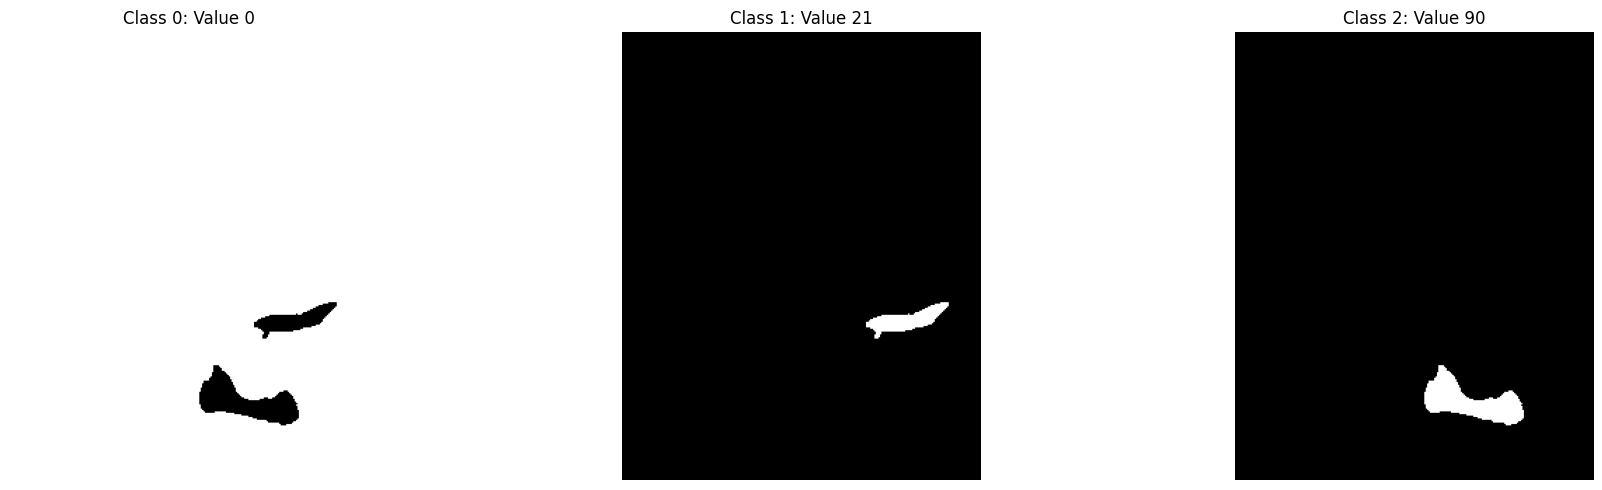

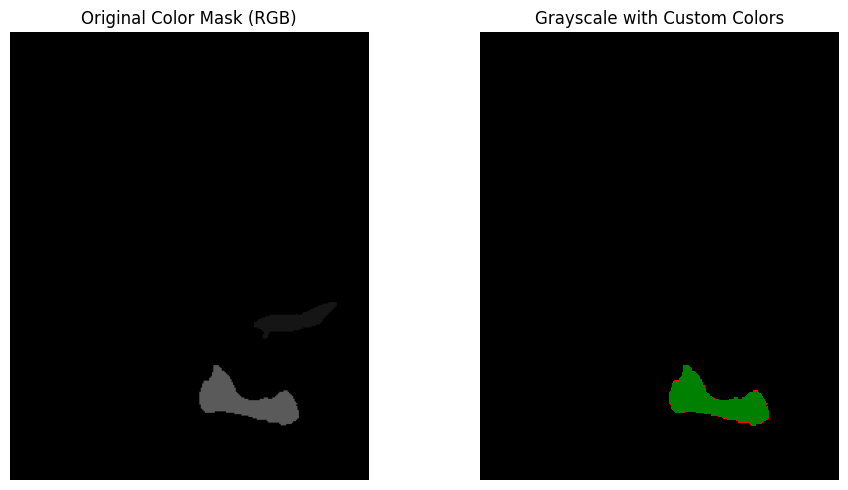

In [4]:
# Create a visualization showing each class separately
if len(unique_values) > 1:
    plt.figure(figsize=(20, 5))
    
    for i, value in enumerate(unique_values):
        plt.subplot(1, len(unique_values), i+1)
        # Create binary mask for this class
        class_mask = (mask_gray == value).astype(np.uint8) * 255
        plt.imshow(class_mask, cmap='gray')
        plt.title(f'Class {i}: Value {value}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Show the color mask with proper RGB conversion
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title('Original Color Mask (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
# Create a custom colormap for better visualization
colors = ['black', 'red', 'green', 'blue', 'yellow', 'magenta', 'cyan']
if len(unique_values) <= len(colors):
    custom_cmap = plt.cm.colors.ListedColormap(colors[:len(unique_values)])
    plt.imshow(mask_gray, cmap=custom_cmap)
    plt.title('Grayscale with Custom Colors')
else:
    plt.imshow(mask_gray, cmap='tab10')
    plt.title('Grayscale with Tab10 Colormap')

plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')